<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.</p>
<p>You can check the documentation <a href="http://scikit-learn.org/stable/datasets/index.html">here</a></p>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(list(iris.target_names))
# print the integers representing the species of each observation
print (iris.target)

data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
data.head()

['setosa', 'versicolor', 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Q.1. How many observations are present for each species?</h3>

In [2]:
# Put the command (or commands) here that would give an answer to the above question.
data.groupby('label').size()

label
0    50
1    50
2    50
dtype: int64

The training data has is evenly balanced among our three plant species.  Each species has 50 observations included in the data.  

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

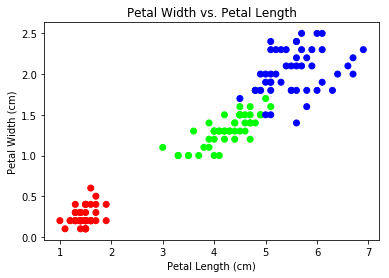

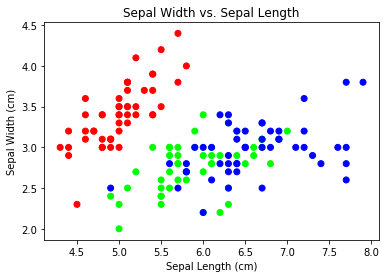

In [3]:
# Write the two plot commands here
#TODO
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# create a custom colormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(data['petal length (cm)'], 
            data['petal width (cm)'],
            c = data['label'],
           cmap = cmap_bold)
plt.title('Petal Width vs. Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.scatter(data['sepal length (cm)'],
            data['sepal width (cm)'],
            c = data['label'],
            cmap = cmap_bold)
plt.title('Sepal Width vs. Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

Plotting the petal width against the petal length allowed for the best visualization of the flower type.  We can see that the *setosa* flowers (in red) have shorter and narrower petals.  As a result the cluster in the bottom left of the plot.  We can also see that there is less variation in the these measures compared to the other two species.  

The other two species both cluster towards the upper right of the plot.  The *versicolor* (green points) tend to have slightly shorter and narrower petals than the *virginica*.  The plot shows that ranges of petal length and width for these two species overlap slightlighy, but a rough boundry between the two species can be visually established.  

<br>
<p>After the initial exploratory data analysis.</p>

<h3>Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:</h3>

In [15]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

# Split training and testing data sets.  Use the random state
# argument to make the split reproducable.  
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

<h3>Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.</h3>

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
fitted_model = clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = fitted_model.predict(X_test)

<h3>Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics</h3>

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

1.0


<h3>Q.7. What accuracy did you obtain?</h3>

The model that developed performs very well with the testing data.  We obtained an accuracy of 100%.  However, I should refrain from calling the model perfect. This result is likely a result of the testing data that we evaluated the model agianst.  Random chance (as controled by the `random_state` argument likely a selected testing data set that our model that allowed the model to perform perfectly.  We could test this assumption by using a different random state and refit the model.

<h3>Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.</h3>

In [18]:
clf2 = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model
fitted_model2 = clf2.fit(X_train, y_train)

# Predicting the Test set results
y_pred2 = fitted_model2.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

1.0


Given that the model we developed using `k = 3`, peformed perfectly we would expect that increasing the nearest neighbors to 5 would have little impact on the model's performance.  This hypothesis holds true when evaluate our alternative model.  We again obtained an accuracy of 100%.  

As noted above this high performance on the testing data is likely due to random chance and the testing data set selected.  As noted above altering the `random_state` argument would alert the testing data set and result in slightly different accuracy.  However, our exploratory analysis still suggests that the nearest neighbors would perform well regardless of the observations that we incorporate into the testing data. 

<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

Given the testing data used in this particular exercise, there is little room for improvement.  However, there are several general approaches we can take to improving model performance on unseen data.  

The first method is include the best of features for a given problem.  Finding the best features for a given problem requires a significant amount of exploratory analysis.  It may even involve developing additional features from the raw data.  

The second method for improving prediction is to use the optimal "hyper-parameters" a given model. In the case of nearest neighbors we can tune the model to find the the best value of k.  A common approch to finding the optimal value for k is to use cross validation.  

Using optimal hyper-parameter tuning is also important for avoding overfitting.  Reducing overfititng of a model reduce the variance of the model and make the model more general.  This will allow the model to perfrom better on the holdout data.  
